# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import spacy
import nltk 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer,WordNetLemmatizer,PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import re 
import pathlib
import glob
from sklearn.decomposition import LatentDirichletAllocation,PCA,NMF
import random
from autocorrect import Speller
from warnings import filterwarnings 
filterwarnings("ignore")
spell = Speller(lang='en')
from nltk.tokenize import sent_tokenize,word_tokenize

In [2]:
data = pd.read_csv("npr.csv")
data.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


# Data Exploration

In [3]:
data.sample(5)

,Article
7977,"Actress Olivia de Havilland, the last survivin..."
5912,Today is the day that the Guinness flows freel...
9913,Along one side of Virunga National Park in the...
8789,"Among the 3, 000 people Hillary Clinton drew t..."
4523,Updated 5:20 a. m. ET Wednesday: Iranian state...


In [4]:
data.index

RangeIndex(start=0, stop=11992, step=1)

In [5]:
data.columns

Index(['Article'], dtype='object')

In [6]:
data[data.duplicated(keep=False)]

,Article
4302,"Washington state has released an estimated 3, ..."
4332,"Washington state has released an estimated 3, ..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  11992 non-null  object
dtypes: object(1)
memory usage: 93.8+ KB


In [8]:
data.describe()

,Article
count,11992
unique,11991
top,"Washington state has released an estimated 3, ..."
freq,2


In [9]:
data.shape

(11992, 1)

In [10]:
data.isna().sum()

Article    0
dtype: int64

# Data Preprocessing

In [11]:
df = data.copy()

In [12]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [22]:
def preprocessing(txt):
    txt = txt.replace('U. S.',"US")
    txt = re.sub(r'[^A-Za-z\s]',' ',txt)
    i = 5
    while i > 0:
        txt = re.sub(r'(\s\w\s)',' ',txt)
        i -= 1
    txt = re.sub('\s+',' ',txt)
    txt = txt.strip()
    return txt.lower()

In [23]:
a = df.iloc[0,0]

In [45]:
preprocessing(a)

'in the washington of even when the policy can be bipartisan the politics cannot and in that sense this year shows little sign of ending on dec when president obama moved to sanction russia over its alleged interference in the us election just concluded some republicans who had long called for similar or more severe measures could scarcely bring themselves to approve house speaker paul ryan called the obama measures appropriate but also overdue and prime example of this administration ineffective foreign policy that has left america weaker in the eyes of the world other gop leaders sounded much the same theme we have been urging president obama for years to take strong action to deter russia worldwide aggression including its operations wrote rep devin nunes chairman of the house intelligence committee now with just few weeks left in office the president has suddenly decided that some stronger measures are indeed warranted appearing on cnn frequent obama critic trent franks called for 

In [25]:
df["Processed_txt"] = df["Article"].apply(preprocessing)

In [26]:
df["Length"] = df["Processed_txt"].apply(lambda x: len(x))

In [31]:
df.head()

,Article,Processed_txt,Length
0,"In the Washington of 2016, even when the polic...",in the washington of even when the policy can ...,7327
1,Donald Trump has used Twitter — his prefe...,donald trump has used twitter his preferred me...,3646
2,Donald Trump is unabashedly praising Russian...,donald trump is unabashedly praising russian p...,4737
3,"Updated at 2:50 p. m. ET, Russian President Vl...",updated at et russian president vladimir putin...,2507
4,"From photography, illustration and video, to d...",from photography illustration and video to dat...,9890


# Data Visualization

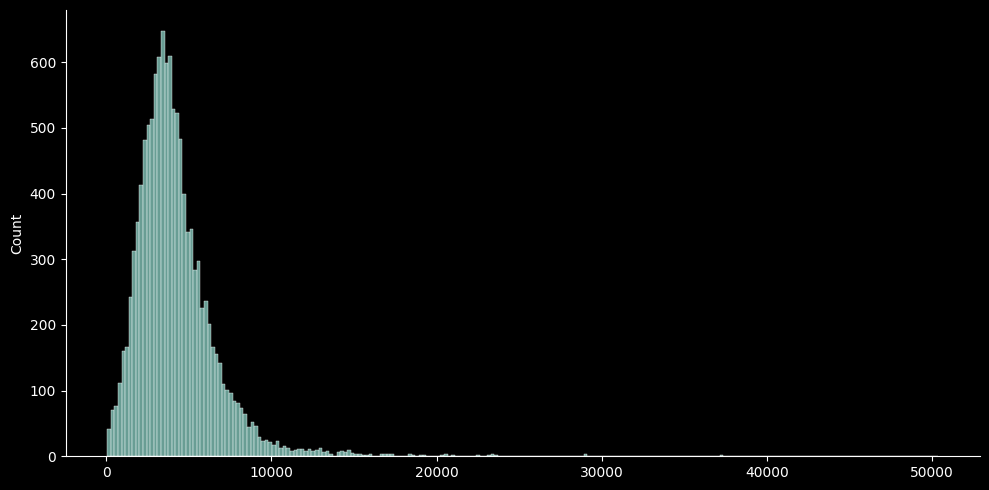

In [33]:
with plt.style.context("dark_background"):
    sns.displot(x=df["Length"].values,aspect=2)
    plt.tight_layout()
    plt.show()

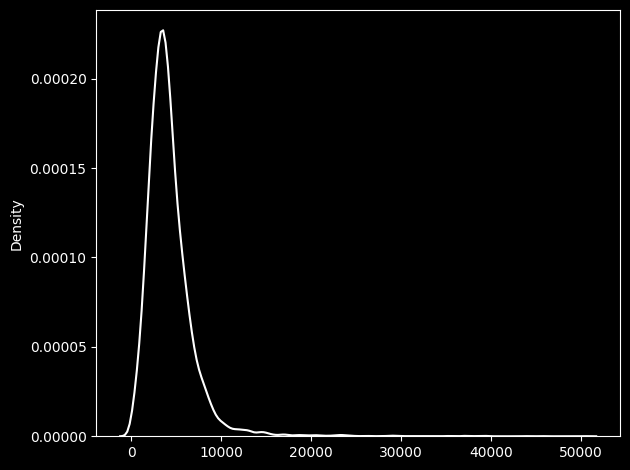

In [36]:
with plt.style.context("dark_background"):
    sns.kdeplot(x=df["Length"].values,color='white')
    plt.tight_layout()
    plt.show()

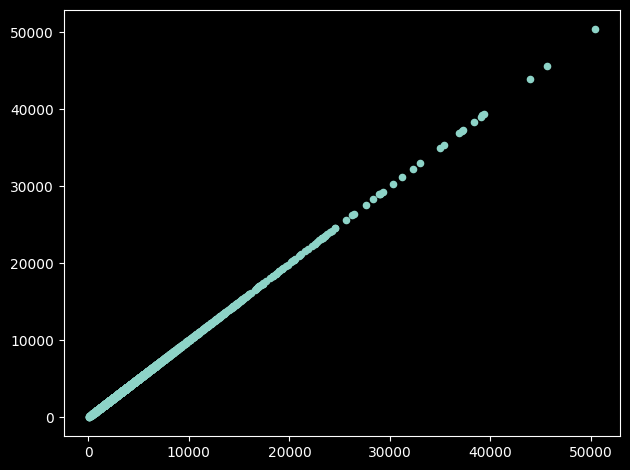

In [37]:
with plt.style.context("dark_background"):
    plt.scatter(x=df["Length"],y=df["Length"],s=20,cmap="YIGn")
    plt.tight_layout()
    plt.show()

# Modeling

In [38]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
dtm = cv.fit_transform(df["Processed_txt"])

In [59]:
n = len(cv.get_feature_names_out())
n

53555

In [65]:
def display_feat(x):
    n = len(x.get_feature_names_out())
    for i in range(20):
        r = random.randint(0,n)
        print(x.get_feature_names_out()[r])

In [66]:
display_feat(cv)

benefits
pilgrimage
diaries
bellboys
radford
subtext
finalist
churning
ioc
marian
swashbuckling
fatigues
fluctuating
gwendolyn
whaley
school
loftily
steeling
residential
upstairs


In [46]:
lda = LatentDirichletAllocation(n_components=7)
lda.fit(dtm)

LatentDirichletAllocation(n_components=7)

In [47]:
len(lda.components_)

7

In [48]:
lda.components_ 

array([[ 0.14288596,  0.14339281,  6.13751905, ...,  4.78324444,
         0.14403134,  0.14285714],
       [ 0.20195025,  0.14288512,  0.14631763, ...,  0.1429856 ,
         3.1416249 , 13.14273165],
       [ 0.14304101,  0.14286998,  0.14302742, ...,  2.50149706,
         0.14288432,  0.14293166],
       ...,
       [ 0.14301292,  0.14293115,  0.14285715, ...,  0.14285983,
         0.142888  ,  0.1428665 ],
       [16.33475883,  0.14329047,  0.14427824, ...,  0.1432459 ,
         0.14285715,  0.14288   ],
       [ 0.14340877,  3.27060801,  0.14290928, ...,  0.1429722 ,
         0.14285715,  0.14285859]])

In [51]:
lda.components_[0].argsort()[:10]

array([38404, 10341, 28125, 40741, 14687, 49374, 15988, 43458, 48181,
       48098], dtype=int64)

In [52]:
lda.components_[0].argsort()[-10:]

array([ 7970, 46000, 25544, 50194, 32176, 27456, 45992, 41954, 35067,
       41774], dtype=int64)

In [68]:
def Display_Cluster(x):
    for t in range(len(x.components_)):
        print(f"Top 15 Words in Topic #{t}")
        print([cv.get_feature_names_out()[y] for y in lda.components_[t].argsort()[-15:]])
        print('\n')

In [69]:
Display_Cluster(lda)

Top 15 Words in Topic #0
['world', 'years', 'time', 'percent', 'research', 'children', 'study', 'just', 'university', 'new', 'like', 'students', 'school', 'people', 'says']


Top 15 Words in Topic #1
['ve', 'years', 'don', 'life', 'music', 'really', 'way', 'new', 'know', 'says', 'think', 'time', 'people', 'just', 'like']


Top 15 Words in Topic #2
['new', 'just', 'years', 'year', 'chinese', 'korea', 'north', 'world', 'women', 'time', 'game', 'team', 'says', 'china', 'said']


Top 15 Words in Topic #3
['time', 'family', 'water', 'home', 'year', 'day', 'new', 'country', 'food', 'city', 'years', 'just', 'like', 'people', 'says']


Top 15 Words in Topic #4
['donald', 'just', 'republican', 'election', 'new', 'state', 'people', 'white', 'obama', 'house', 'campaign', 'clinton', 'president', 'said', 'trump']


Top 15 Words in Topic #5
['new', 'state', 'federal', 'tax', 'year', 'drug', 'medical', 'insurance', 'patients', 'percent', 'said', 'care', 'people', 'says', 'health']


Top 15 Words in T

In [54]:
topic_results = lda.transform(dtm)

In [55]:
topic_results.shape

(11991, 7)

In [58]:
topic_results[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.87, 0.  , 0.13])

In [57]:
topic_results.argmax(axis=1)

array([4, 4, 4, ..., 0, 4, 3], dtype=int64)

In [76]:
tf = TfidfVectorizer(max_df=0.9,min_df=2)
dtm = tf.fit_transform(df["Processed_txt"])

In [77]:
display_feat(tf)

err
item
walsh
internationalist
botswana
systemic
signing
schuman
sightseeing
mcbride
gamelan
budding
signatures
motivated
ingress
khans
harrisonburg
yanukovych
sizes
milkshake


In [78]:
dtm.get_shape()

(11991, 53845)

In [79]:
nmf = NMF(n_components=7)
nmf.fit(dtm)

NMF(n_components=7)

In [80]:
nmf.components_

array([[1.57682559e-03, 0.00000000e+00, 1.83251591e-03, ...,
        0.00000000e+00, 4.28537276e-04, 1.30979358e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.86906089e-03, 3.62759358e-03, 0.00000000e+00, ...,
        1.68288416e-03, 1.12171447e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.29729904e-03, 0.00000000e+00, ...,
        0.00000000e+00, 2.04240969e-06, 0.00000000e+00],
       [2.44927566e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.78115906e-05, 0.00000000e+00, 1.63700770e-03]])

In [82]:
nmf.components_[0].argsort()[-10:]

array([27588, 38750,   140, 44479, 53592, 52541, 48218, 31737, 52265,
       53581], dtype=int64)

In [83]:
Display_Cluster(nmf)

Top 15 Words in Topic #0
['world', 'years', 'time', 'percent', 'research', 'children', 'study', 'just', 'university', 'new', 'like', 'students', 'school', 'people', 'says']


Top 15 Words in Topic #1
['ve', 'years', 'don', 'life', 'music', 'really', 'way', 'new', 'know', 'says', 'think', 'time', 'people', 'just', 'like']


Top 15 Words in Topic #2
['new', 'just', 'years', 'year', 'chinese', 'korea', 'north', 'world', 'women', 'time', 'game', 'team', 'says', 'china', 'said']


Top 15 Words in Topic #3
['time', 'family', 'water', 'home', 'year', 'day', 'new', 'country', 'food', 'city', 'years', 'just', 'like', 'people', 'says']


Top 15 Words in Topic #4
['donald', 'just', 'republican', 'election', 'new', 'state', 'people', 'white', 'obama', 'house', 'campaign', 'clinton', 'president', 'said', 'trump']


Top 15 Words in Topic #5
['new', 'state', 'federal', 'tax', 'year', 'drug', 'medical', 'insurance', 'patients', 'percent', 'said', 'care', 'people', 'says', 'health']


Top 15 Words in T

In [84]:
topic_results = nmf.transform(dtm)
topic_results.shape

(11991, 7)

In [85]:
topic_results[0].round(2)

array([0.  , 0.11, 0.  , 0.  , 0.07, 0.  , 0.01])

In [87]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 2, 1, 2], dtype=int64)